## Importing required libraries


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import scipy
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import metrics

### Getting the data from the file

In [ ]:
# Load the matlab data files
matData = scipy.io.loadmat('data.mat')

# Access the QSAR_data using the 'QSAR_data' key
QSAR_data = matData['QSAR_data']

# Convert the data to a pandas DataFrame
QSAR_data_df = pd.DataFrame(QSAR_data)

print(QSAR_data_df.info())

print(QSAR_data_df.describe())

y_before = QSAR_data_df.iloc[:, -1]

# Assign the first 41 columns to features (X)
X_before = QSAR_data_df.iloc[:, :-1]

## Graph for each feature

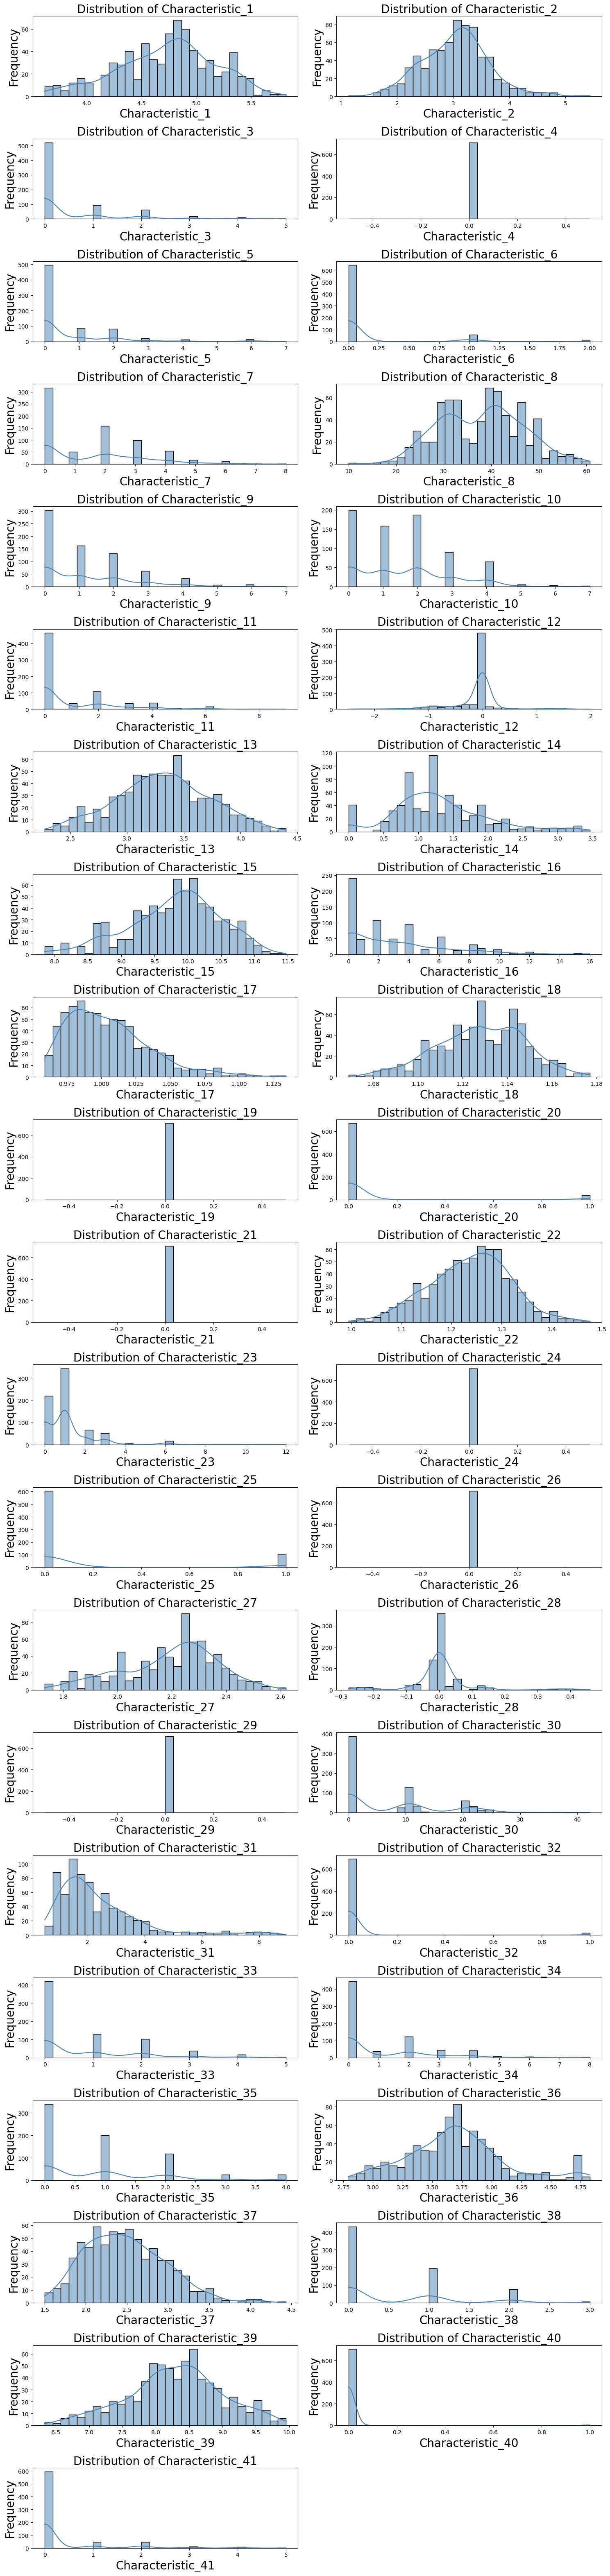

In [ ]:
# Determine the number of characteristics in the dataset
num_characteristics = X_before.shape[1]

# Define the number of plots to be displayed in each row
plots_per_row = 2

# Calculate the required number of rows for the subplot grid
num_rows = (num_characteristics + plots_per_row - 1) // plots_per_row

# Set the figure size based on the number of rows and plots per row
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 3*num_rows))

# Flatten the axes array for simplified indexing
axes = axes.flatten()

# Iterate through each characteristic and create a histogram subplot
for i in range(num_characteristics):
    ax = axes[i]
    sns.histplot(X.iloc[:, i], bins=30, kde=True, color='steelblue', ax=ax)
    ax.set_title(f'Distribution of Characteristic_{i+1}', fontsize=20)
    ax.set_xlabel(f'Characteristic_{i+1}', fontsize=20)
    ax.set_ylabel('Frequency', fontsize=20)

# Hide any remaining empty subplots, if present
for i in range(num_characteristics, num_rows * plots_per_row):
    axes[i].axis('off')

# Adjust layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()

##Correlation matrix

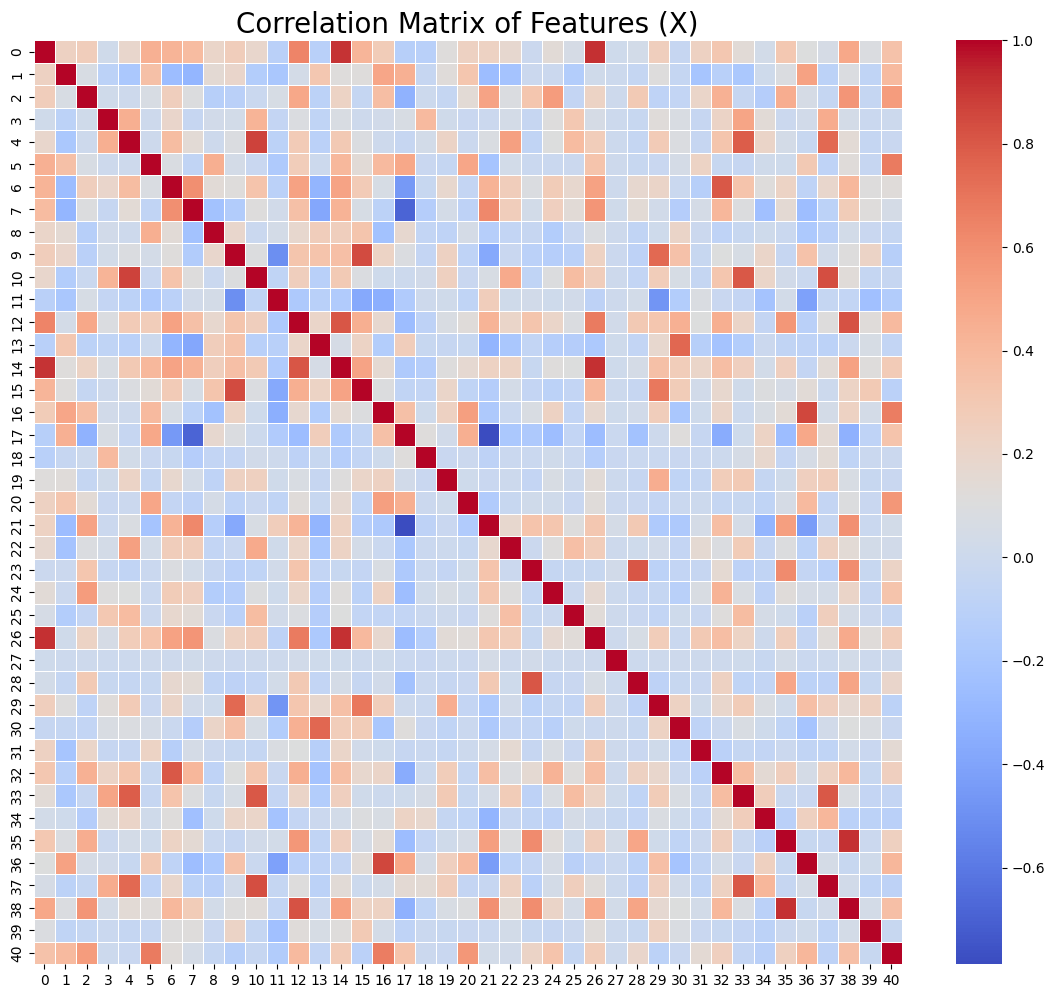

In [ ]:
# Visualize the correlation matrix of features (X)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(X_before.corr(), cmap='coolwarm', linewidths=.5)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)
plt.title('Correlation Matrix of Features (X)', fontsize=20)
plt.show()

## Percentage Distribution of labels

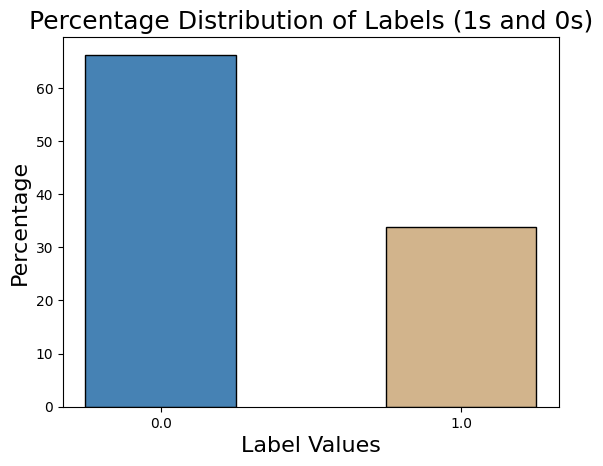

In [ ]:
# Calculate the percentage of each unique value
unique_values, counts = np.unique(y_before, return_counts=True)
percentages = (counts / len(y_before)) * 100

# Plotting the bar chart with adjusted bar width, improved colors, and grid lines
plt.bar(unique_values, percentages, tick_label=unique_values, color=['steelblue', 'tan'], width=0.5, edgecolor='black')
plt.xlabel('Label Values', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.title('Percentage Distribution of Labels (1s and 0s)', fontsize=18)
plt.show()

## Data Preprocessing
Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model



In [ ]:
#remove duplicate rows - 3 rows where removed
data_without_duplicates = QSAR_data_df.drop_duplicates()

#check for missing values
data_without_duplicates.isnull().sum()

# Replace NaN values with zeros
latestData = data_without_duplicates.fillna(data_without_duplicates.mean())

In [ ]:
# Calculate the Z-scores for each column
z_scores = stats.zscore(latestData)

# Define a threshold for considering a data point as an outlier (e.g., Z-score > 3 or < -3)
threshold = 3

# Find the indices of outliers
outlier_indices = (abs(z_scores) > threshold).any(axis=1)

# Drop the rows containing outliers
QSAR_data_df_no_outliers = latestData[~outlier_indices]

# Display the shape before and after removing outliers
print("Shape before removing outliers:", latestData.shape)
print("Shape after removing outliers:", QSAR_data_df_no_outliers.shape)

Shape before removing outliers: (1052, 42)
Shape after removing outliers: (710, 42)


In [ ]:
# Assign the last column to labels (y)
y = QSAR_data_df_no_outliers.iloc[:, -1]

# Assign the first 41 columns to features (X)
X = QSAR_data_df_no_outliers.iloc[:, :-1]

## Normalizing the dataset - Decreased the accuracy

Feature scaling is bringing all of the features on the dataset to the same scale. This is necessary because in some cases the dominant features become so dominant that the other ordinary features are not considered for the model

All the values in the dataset are now between 0 and 1 so there are non dominant features

In [ ]:
# Instantiate MinMaxScaler for min-max scaling
#min_max_scaler = MinMaxScaler()

# Fit and transform the min-max scaler on the training data (already standardized)
#X_train_normal = min_max_scaler.transform(X_train)

# Transform the test data using the same min-max scaler (already standardized)
#X_test_normal = min_max_scaler.transform(X_test)

## Splitting the data and Standard Scaling


In [ ]:
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
standard_scaler = StandardScaler()
#fit the training data
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

#Logistic Regression with Regularization

In [ ]:
class LogisticRegressionWithRegularization():
    def __init__(self, learning_rate, num_iterations, regularization_param):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.regularization_param = regularization_param  # Regularization parameter (lambda)

    def fit(self, X, y):
        self.num_samples, self.num_features = X.shape
        self.weights = np.zeros(self.num_features)
        self.bias = 0
        self.X = X
        self.y = y

        for i in range(self.num_iterations):
            self.update_weights()

    def update_weights(self):
        predicted_values = 1 / (1 + np.exp(-(self.X.dot(self.weights) + self.bias)))
        dw = (1 / self.num_samples) * (self.X.T.dot(predicted_values - self.y) + self.regularization_param * self.weights)
        db = (1 / self.num_samples) * np.sum(predicted_values - self.y)

        self.weights = self.weights - self.learning_rate * dw
        self.bias = self.bias - self.learning_rate * db

    def predict(self, X):
        predicted_values = 1 / (1 + np.exp(-(X.dot(self.weights) + self.bias)))
        predicted_values = np.where(predicted_values > 0.5, 1, 0)
        return predicted_values

    def predict_proba(self, X):
        probabilities = 1 / (1 + np.exp(-(X.dot(self.weights) + self.bias)))
        return probabilities

    def get_params(self, deep=True):
        return {
            'learning_rate': self.learning_rate,
            'num_iterations': self.num_iterations,
            'regularization_param': self.regularization_param
        }

## Training of the model

In [ ]:
logisticModel = LogisticRegressionWithRegularization(learning_rate=0.01, num_iterations=1000, regularization_param=150)
logisticModel.fit(X_train, y_train)

## Evaluation of the model

In [ ]:
# accuracy score on the training data
X_train_prediction = logisticModel.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)

print('Accuracy score of the training data : ', training_data_accuracy*100,'%')

# accuracy score on the test data
X_test_prediction = logisticModel.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)

print('Accuracy score of the test data : ', test_data_accuracy*100,'%')

Accuracy score of the training data :  80.98591549295774 %
Accuracy score of the test data :  85.2112676056338 %


In [ ]:
# Perform k-fold cross-validation (e.g., k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Use cross_val_score to get accuracy scores for each fold
accuracy_scores = cross_val_score(logisticModel, X_train, y_train, cv=kf, scoring='accuracy')

# Print the average accuracy across all folds
print("Average Accuracy:", np.mean(accuracy_scores))

In [ ]:
print("Precision: ", precision(y_test, X_test_prediction)*100,'%')
print("Recall: ", recall(y_test, X_test_prediction)*100,'%')
print("F1: ", f1(y_test, X_test_prediction)*100,'%')

Precision:  82.0 %
Recall:  77.35849056603774 %
F1:  79.6116504854369 %


## ROC Curve

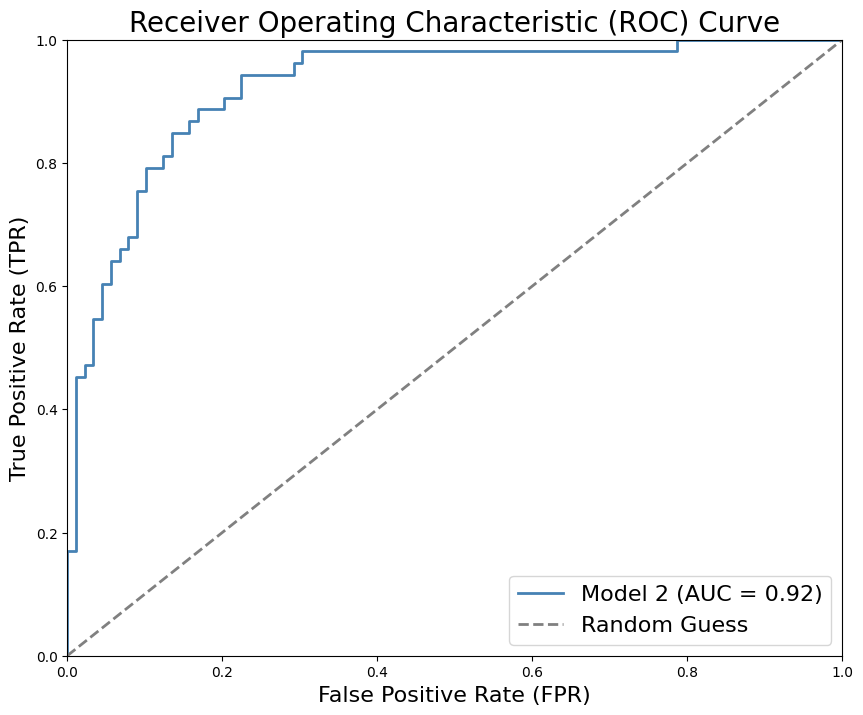

In [ ]:
# Get predicted probabilities from the logistic model
predicted_proba_model_2 = logisticModel.predict_proba(X_test)

# Calculate the ROC curve metrics
false_positive_rate_model_2, true_positive_rate_model_2, _ = metrics.roc_curve(y_test, predicted_proba_model_2)
area_under_curve_model_2 = metrics.auc(false_positive_rate_model_2, true_positive_rate_model_2)

# Plot both ROC curves
plt.figure(figsize=(10, 8))  # Increase the figure size for better visibility
plt.plot(false_positive_rate_model_2, true_positive_rate_model_2, color='steelblue', lw=2, label=f'Model 2 (AUC = {area_under_curve_model_2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)', fontsize=16)  # Increase the font size
plt.ylabel('True Positive Rate (TPR)', fontsize=16)  # Increase the font size
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=20)  # Increase the font size
plt.legend(loc='lower right', fontsize=16)  # Increase the font size
plt.show()


## Confusion Matrix

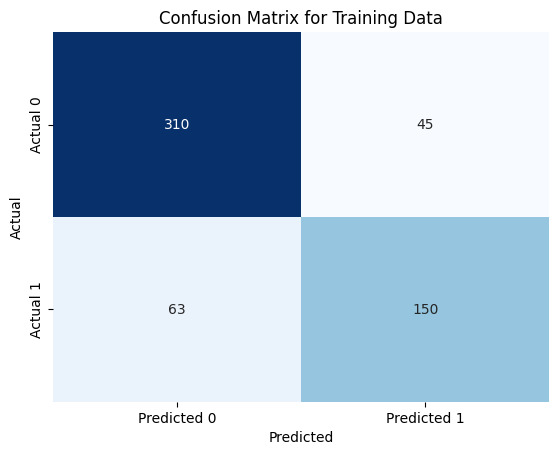

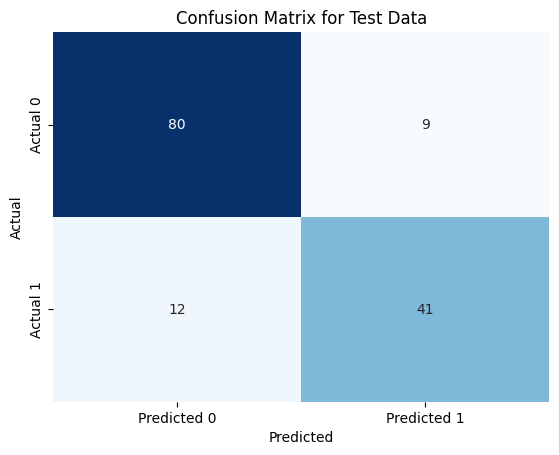

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Confusion matrix for training data
conf_matrix_train = confusion_matrix(y_train, X_train_prediction)
plot_confusion_matrix(conf_matrix_train, 'Confusion Matrix for Training Data')

# Confusion matrix for test data
conf_matrix_test = confusion_matrix(y_test, X_test_prediction)
plot_confusion_matrix(conf_matrix_test, 'Confusion Matrix for Test Data')


#KNN Algorithm

In [ ]:
class KNeighborsClassifier():

    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric

    def most_common(lst):
      return max(set(lst), key=lst.count)

    def euclidean(point, data):
      return np.sqrt(np.sum((point - data)**2, axis=1))

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy


The model performs best for k=5

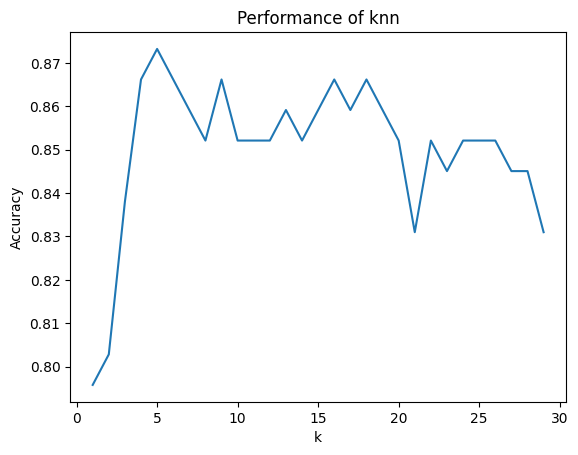

In [ ]:
accuracies = []
ks = range(1, 30)
for k in ks:
    knn = KNeighborsClassifier(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy)
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

In [ ]:
knn = KNeighborsClassifier(k=5)
knn.fit(X_train, y_train)

X_train_prediction = knn.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)

print('Accuracy score of the training data : ', training_data_accuracy*100,'%')

# accuracy score on the test data
X_test_prediction = knn.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)

print('Accuracy score of the test data : ', test_data_accuracy*100,'%')

Accuracy score of the training data :  88.73239436619718 %
Accuracy score of the test data :  87.32394366197182 %


In [ ]:
print("Precision: ", precision(y_test, X_test_prediction)*100,'%')
print("Recall: ", recall(y_test, X_test_prediction)*100,'%')
print("F1: ", f1(y_test, X_test_prediction)*100,'%')

Precision:  87.2340425531915 %
Recall:  77.35849056603774 %
F1:  82.0 %


# Logistic Regression

In [ ]:
class LogisticRegression:

    def __init__(self, learning_rate, n_iters):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)



## Training of the model

In [ ]:
model = LogisticRegression(learning_rate=0.001, n_iters=1000)
model.fit(X_train, y_train)

## Evaluation of the model

In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score( y_train, X_train_prediction)


print('Accuracy score of the training data : ', training_data_accuracy*100, '%')

# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score( y_test, X_test_prediction)

print('Accuracy score of the test data : ', test_data_accuracy*100, '%')

Accuracy score of the training data :  79.40140845070422 %
Accuracy score of the test data :  81.69014084507043 %


In [ ]:
print("Precision: ", precision(y_test, X_test_prediction)*100, '%')
print("Recall: ", recall(y_test, X_test_prediction)*100, '%')
print("F1: ", f1(y_test, X_test_prediction)*100, '%')

Precision:  72.88135593220339 %
Recall:  81.13207547169812 %
F1:  76.78571428571428 %


## ROC Curve

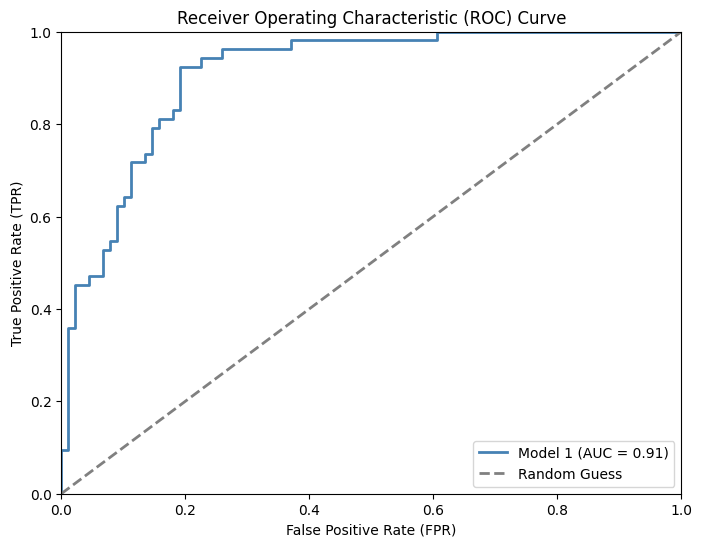

In [ ]:
# Get predicted probabilities for the positive class (class 1) from the first model
predicted_proba_model_1 = model.predict_proba(X_test)
false_positive_rate_model_1, true_positive_rate_model_1, _ = metrics.roc_curve(y_test, predicted_proba_model_1)
area_under_curve_model_1 = metrics.auc(false_positive_rate_model_1, true_positive_rate_model_1)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate_model_1, true_positive_rate_model_1, color='steelblue', lw=2, label=f'Model 1 (AUC = {area_under_curve_model_1:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Confusion Matrix

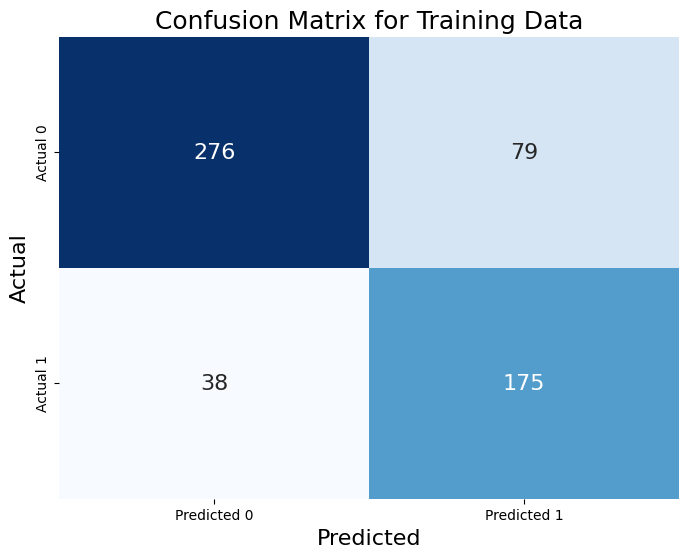

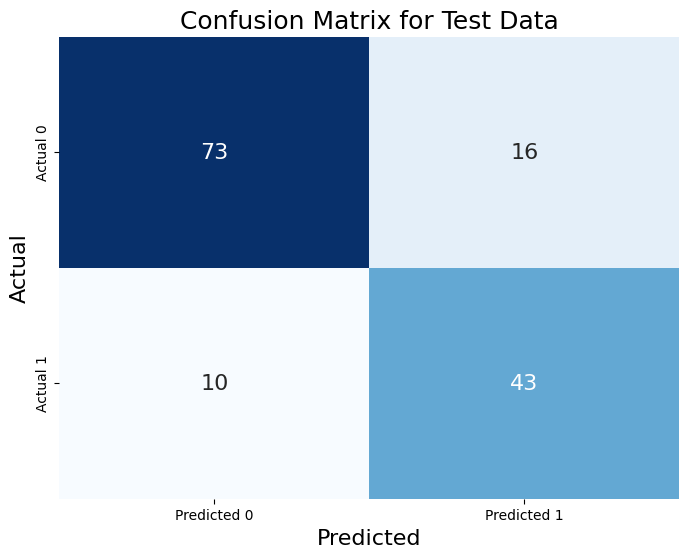

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))  # Increase the figure size for better visibility
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'], annot_kws={"size": 16})  # Increase the font size
    plt.title(title, fontsize=18)  # Increase the font size
    plt.xlabel('Predicted', fontsize=16)  # Increase the font size
    plt.ylabel('Actual', fontsize=16)  # Increase the font size
    plt.show()

# Confusion matrix for training data
conf_matrix_train = confusion_matrix(y_train, X_train_prediction)
plot_confusion_matrix(conf_matrix_train, 'Confusion Matrix for Training Data')

# Confusion matrix for test data
conf_matrix_test = confusion_matrix(y_test, X_test_prediction)
plot_confusion_matrix(conf_matrix_test, 'Confusion Matrix for Test Data')


# ROC Curve Logistic Regression vs Logistic Regression with Regularization


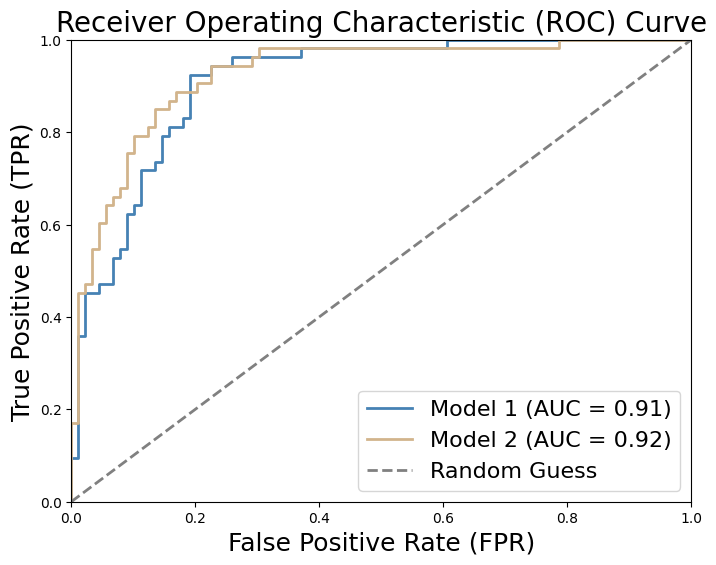

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (class 1) from the first model
y_pred_proba_1 = model.predict_proba(X_test)
fpr_1, tpr_1, _ = metrics.roc_curve(y_test, y_pred_proba_1)
roc_auc_1 = metrics.auc(fpr_1, tpr_1)

# Get predicted probabilities for the positive class (class 1) from the second model
# Replace 'model_2' with the actual variable name of your second model
y_pred_proba_2 = logisticModel.predict_proba(X_test)
fpr_2, tpr_2, _ = metrics.roc_curve(y_test, y_pred_proba_2)
roc_auc_2 = metrics.auc(fpr_2, tpr_2)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='steelblue', lw=2, label=f'Model 1 (AUC = {roc_auc_1:.2f})')
plt.plot(fpr_2, tpr_2, color='tan', lw=2, label=f'Model 2 (AUC = {roc_auc_2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)', fontsize=18)
plt.ylabel('True Positive Rate (TPR)', fontsize=18)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=20)
plt.legend(loc='lower right', fontsize=16)
plt.show()


# Model Evaluation


In [ ]:
#True Positive
def true_positive(ground_truth, prediction):
    tp = 0
    for gt, pred in zip(ground_truth, prediction):
        if gt == 1 and pred == 1:
            tp +=1
    return tp

#True Negative
def true_negative(ground_truth, prediction):
    tn = 0
    for gt, pred in zip(ground_truth, prediction):
        if gt == 0 and pred == 0:
            tn +=1
    return tn

#False Positive
def false_positive(ground_truth, prediction):
    fp = 0
    for gt, pred in zip(ground_truth, prediction):
        if gt == 0 and pred == 1:
            fp +=1
    return fp

#False Negative
def false_negative(ground_truth, prediction):
    fn = 0
    for gt, pred in zip(ground_truth, prediction):
        if gt == 1 and pred == 0:
            fn +=1
    return fn

def accuracy(ground_truth, prediction):
    tp = true_positive(ground_truth, prediction)
    fp = false_positive(ground_truth, prediction)
    fn = false_negative(ground_truth, prediction)
    tn = true_negative(ground_truth, prediction)
    acc_score = (tp + tn)/ (tp + tn + fp + fn)
    return acc_score

def precision(ground_truth, prediction):
    tp = true_positive(ground_truth, prediction)
    fp = false_positive(ground_truth, prediction)
    prec = tp/ (tp + fp)
    return prec


def recall(ground_truth, prediction):
    tp = true_positive(ground_truth, prediction)
    fn = false_negative(ground_truth, prediction)
    prec = tp/ (tp + fn)
    return prec

def f1(ground_truth, prediction):
    p = precision(ground_truth, prediction)
    r = recall(ground_truth, prediction)
    f1_score = 2 * p * r/ (p + r)
    return f1_score